In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("4-Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [4]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]
df.drop(index=122,inplace=True)

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:123,"Region"]=0
df.loc[123:,"Region"]=1

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [10]:
df= df.dropna().reset_index(drop=True)

In [11]:
df.iloc[(121)]

day                     30
month                    9
year                  2012
Temperature             25
 RH                     78
 Ws                     14
Rain                   1.4
FFMC                    45
DMC                    1.9
DC                     7.5
ISI                    0.2
BUI                    2.4
FWI                    0.1
Classes        not fire   
Region                 0.0
Name: 121, dtype: object

In [12]:
df.iloc[(122)]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                 1.0
Name: 122, dtype: object

# 📍 Pandas `.loc` Kullanım Rehberi (Label-Based Selection)

Pandas'ta `.loc` (Location), veriyi **Etiketlerine (İsimlerine)** göre seçmek için kullanılır. Veri manipülasyonunun İsviçre Çakısıdır.

> **Temel Sözdizimi:** `df.loc[ SATIR_SEÇİMİ , SÜTUN_SEÇİMİ ]`

---

## 1. Temel Seçim İşlemleri (Selection)
Belirli satır ve sütunlara **isimleriyle** erişmek için kullanılır.

* **Tek Bir Hücre:**
    ```python
    # İndeksi '5' olan satırın, 'Temperature' sütunundaki değeri
    deger = df.loc[5, 'Temperature']
    ```

* **Belirli Sütunları Seçme:**
    ```python
    # Tüm satırlar (:), sadece 'Classes' ve 'FWI' sütunları
    subset = df.loc[:, ['Classes', 'FWI']]
    ```

---

## 2. Dilimleme (Slicing) - ⚠️ Önemli Fark!
Normal Python listelerinin aksine, `.loc` ile yapılan dilimlemede **BİTİŞ DEĞERİ DAHİLDİR.**

* **Satır Dilimleme:**
    ```python
    # 0'dan 10'a kadar olan satırları getir (10. Satır DAHİL!)
    df.loc[0:10, :]
    ```

* **Sütun Dilimleme (İsimle):**
    ```python
    # 'Temperature' sütunundan 'Rain' sütununa kadar olan aralığı getir
    df.loc[:, 'Temperature':'Rain']
    ```

---

## 3. Filtreleme (Boolean Indexing) - En Güçlü Özellik 🧠
SQL'deki `WHERE` komutu gibi, veriyi belirli koşullara göre süzer.

* **Tek Koşul:**
    ```python
    # Sadece sıcaklığın 35'ten büyük olduğu günleri getir
    sicak_gunler = df.loc[df['Temperature'] > 35]
    ```

* **Çoklu Koşul (VE / VEYA):**
    * `&` : VE (And)
    * `|` : VEYA (Or)
    ```python
    # Sıcaklık 30'dan büyük VE Nem 50'den küçükse (Yangın Riski)
    riskli = df.loc[(df['Temperature'] > 30) & (df['RH'] < 50)]
    ```

* **String Arama:**
    ```python
    # Classes içinde 'fire' kelimesi geçenleri bul
    yanginlar = df.loc[df['Classes'].str.contains('fire')]
    ```

---

## 4. Değer Atama ve Değiştirme (Setting Values) ✏️
Seçtiğiniz veriyi değiştirmek için kullanılır.

* **Koşullu Değişiklik:**
    ```python
    # Sıcaklığı 40'tan büyük olan günlerin 'Risk_Level' sütununu 'High' yap
    df.loc[df['Temperature'] > 40, 'Risk_Level'] = 'High'
    ```

* **Çoklu Atama:**
    ```python
    # 122. satırdan sonraki tüm satırların 'Region' bilgisini 1 yap
    df.loc[122:, 'Region'] = 1
    ```

---

## 5. Karşılaştırma: `.loc` vs `.iloc`

| Özellik | `.loc` (Location) | `.iloc` (Integer Location) |
| :--- | :--- | :--- |
| **Mantık** | **Etiket (İsim)** bazlıdır. | **İndeks (Sıra)** bazlıdır. |
| **Bitiş Elemanı** | **Dahildir** (`0:5` -> 0,1,2,3,4,5). | **Dahil Değildir** (`0:5` -> 0,1,2,3,4). |
| **Sütun Seçimi** | Sütun isimleri (`'Price'`) | Sütun numaraları (`3`) |
| **Kullanım** | Analiz ve Filtreleme (%95) | Döngüler ve Otomasyon |

> **💡 İpucu:** Analiz yaparken her zaman `.loc` tercih edin. Sütunların sırasının değişmesi `.iloc`'u bozar ama `.loc`'u bozmaz.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [14]:
df.columns=df.columns.str.strip()
# column isimlerinde boşluklar vardı onları sildik strip() ile 

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [16]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [17]:
df[df["day"]== "day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [18]:
df.drop(index=122,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.4+ KB


In [20]:
df[["Rain","FWI","BUI","ISI","DMC","FFMC","DC"]]=df[["Rain","FWI","BUI","ISI","DMC","FFMC","DC"  ]].astype(float)

In [21]:
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [22]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [23]:
df["Classes"] =np.where(df["Classes"].str.contains("not fire"),0,1)

In [24]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [26]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0


In [27]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


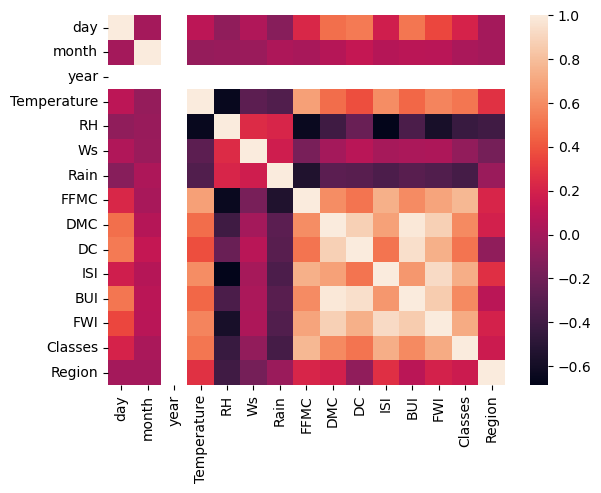

In [28]:
sns.heatmap(df.corr())
plt.show()

In [29]:
df.drop(["day","month","year"],axis=1,inplace = True)

In [30]:
X = df.drop(["FWI"],axis=1)
y = df["FWI"]

In [31]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [32]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [35]:
(X_train.corr())

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644794,-0.339213,-0.215968,0.597191,0.482941,0.361196,0.590588,0.451536,0.462011,0.243017
RH,-0.644794,1.000000,0.230042,0.166562,-0.629508,-0.381890,-0.187851,-0.676202,-0.321689,-0.404402,-0.397560
Ws,-0.339213,0.230042,1.000000,0.154261,-0.162712,-0.011558,0.082974,-0.010483,0.028577,-0.062554,-0.168643
Rain,-0.215968,0.166562,0.154261,1.000000,-0.483704,-0.263983,-0.285795,-0.330283,-0.278005,-0.366848,0.050401
FFMC,0.597191,-0.629508,-0.162712,-0.483704,1.000000,0.591460,0.481209,0.740712,0.575636,0.770353,0.205923
DMC,0.482941,-0.381890,-0.011558,-0.263983,0.591460,1.000000,0.873356,0.669970,0.980996,0.554171,0.163465
DC,0.361196,-0.187851,0.082974,-0.285795,0.481209,0.873356,1.000000,0.478056,0.939641,0.474526,-0.113130
ISI,0.590588,-0.676202,-0.010483,-0.330283,0.740712,0.669970,0.478056,1.000000,0.629210,0.713151,0.270956
BUI,0.451536,-0.321689,0.028577,-0.278005,0.575636,0.980996,0.939641,0.629210,1.000000,0.556359,0.053428
Classes,0.462011,-0.404402,-0.062554,-0.366848,0.770353,0.554171,0.474526,0.713151,0.556359,1.000000,0.166872


In [36]:
def corr_for_dropping(df, threshold):
    cor = df.corr()
    columns_to_drop = set()
    
    # Döngü tüm sütunları gezmeli
    for i in range(len(cor.columns)):
        for j in range(i):
            # Eğer korelasyon eşikten büyükse havuza at
            if abs(cor.iloc[i, j]) > threshold:
                columns_to_drop.add(cor.columns[i])
    
    # DİKKAT: return döngü bittikten SONRA çalışmalı (girintiyi sola çektik)
    return columns_to_drop

In [37]:
columns_droping = corr_for_dropping(X_train,0.85)


In [38]:
columns_droping

{'BUI', 'DC'}

In [39]:
X_train.drop(columns_droping,axis=1,inplace=True)
X_test.drop(columns_droping,axis=1,inplace=True)


In [40]:
X_train.shape

(170, 9)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

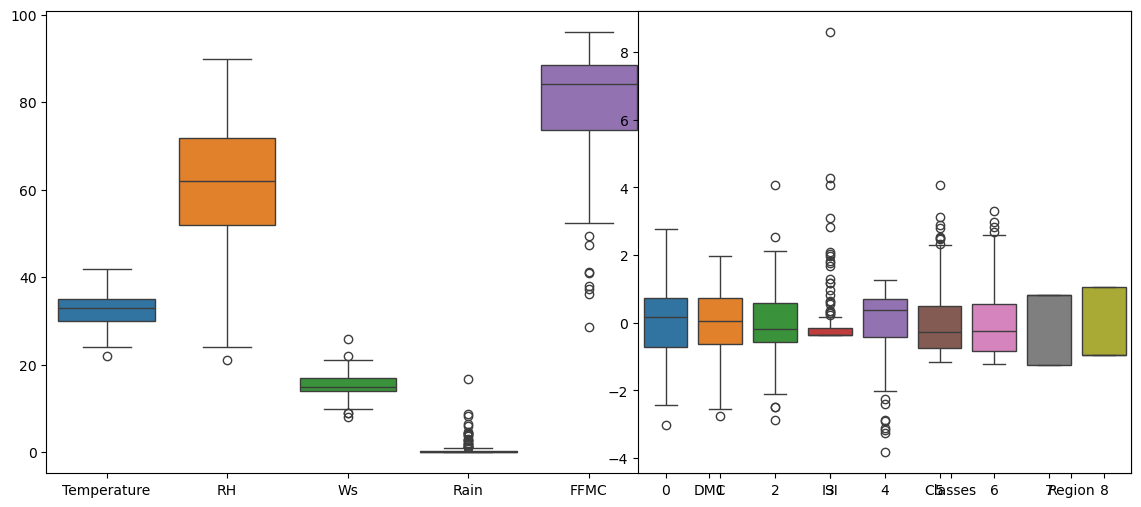

In [58]:
plt.figure(figsize=(14,6))
sns.boxplot(data=X_train)
plt.subplot(1,2,2)

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.show()

<Axes: >

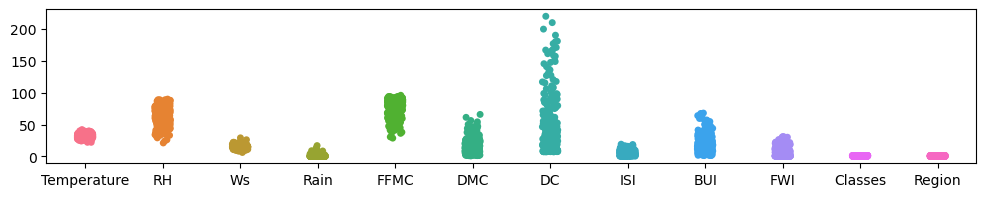

In [55]:
plt.figure(figsize=(12,2))
sns.stripplot(df)
